# ShopSmart Inc
ShopSmart Inc. is an e-commerce platform that sells a variety of products online. The company aims to optimize its website and enhance customer satisfaction by understanding customer behavior and preferences. To achieve this goal, ShopSmart Inc. plans to analyze the data collected from its website to gain insights into customer interactions, purchasing patterns, and product preferences.
Project Objective: The objective of this project is to utilize data from ShopSmart Inc.'s website to understand customer behavior and preferences. By analyzing the data, the company aims to:
1.     Segment customers based on their preferences, geographic location, and purchasing behavior.
2.     Enhance website usability and user experience based on insights gained from customer interactions.
3.     Optimize product offerings and marketing strategies to improve customer satisfaction and retention.
Data Sources:
The data for this project will be sourced from ShopSmart Inc.'s website and will include various attributes such as customer IDs, device IDs, transaction details, product information, and timestamps of customer interactions.
 
Methodology:
The project will involve data wrangling to preprocess the dataset, followed by exploratory data analysis (EDA) to uncover patterns and trends in customer behavior. Visualization techniques will be used to present the findings effectively.
Expected Outcome:
By understanding customer behavior and preferences, ShopSmart Inc. aims to optimize its website, product offerings, and marketing strategies to increase customer satisfaction, retention, and ultimately, revenue.
 
You are provided with 5 datasets from different tables, your first task is to merge the datasets, clean and wrangle the dataset, engineer new features from event data. Then identify the following</br>
a.     Visit Frequency:</br>
How often does this customer visit the website, based on the provided data?</br>
Can you identify any patterns or trends in the customer's visit frequency?</br>
b. 	Location Analysis:</br>
What is the customer's location based on the provided data?</br>
How might the customer's location influence their purchasing behavior?</br>
c.  	Overall Purchase Behavior:</br>
Based on the data provided, what insights can you draw about this customer's overall behavior on the website?</br>
How might these insights inform marketing strategies or personalized recommendations for this customer?



In [1]:
"""Import basic modules"""
import math
import os
import gc
import random
import pprint
import numpy as np               # For linear algebra
import pandas as pd              # For data manipulation
import matplotlib.pyplot as plt  # For 2D visualization
%matplotlib inline
import seaborn as sns
from datetime import datetime
import json

# Warning Libraries 
import warnings
warnings.filterwarnings("ignore")
# warnings.simplefilter(action='ignore', category=FutureWarning)

"""Plotly visualization"""
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot

"""Printing Markdown for comments"""
from IPython.display import Markdown, display

# utility function to print markdown string
def printmd(string):
    display(Markdown(string))

# 1. Loading the dataset

In [2]:
# Load datasets

# Load customers data
customers = pd.read_csv('https://github.com/godekina/ds-exams/blob/26ec22ee873f9523f7927d34e38546490c58cfca/customer_data/customers.csv?raw=true')

# Load events data
events = pd.read_csv('https://github.com/godekina/ds-exams/blob/26ec22ee873f9523f7927d34e38546490c58cfca/customer_data/events.csv?raw=true')

# Load orders data
orders = pd.read_csv('https://github.com/godekina/ds-exams/blob/26ec22ee873f9523f7927d34e38546490c58cfca/customer_data/orders.csv?raw=true')

# Load line_items data
line_items = pd.read_csv('https://github.com/godekina/ds-exams/blob/26ec22ee873f9523f7927d34e38546490c58cfca/customer_data/line_items.csv?raw=true')

# Load products data
products = pd.read_csv('https://github.com/godekina/ds-exams/blob/26ec22ee873f9523f7927d34e38546490c58cfca/customer_data/products.csv?raw=true')

## Exploring each loaded dataset

In [3]:
printmd(f"The columns contained in the Customer table are: **{customers.columns}**")
printmd(f"The shape of the Customer table is: **{customers.shape}**")
printmd("**The first 5 observations of the Customer table is:**")
display(customers.head())

printmd(f"The columns contained in the Events table are: **{events.columns}**")
printmd(f"The shape of the Events table is: **{events.shape}**")
printmd("**The first 5 observations of the Events table is:**")
display(events.head())

printmd(f"The columns contained in the Line Items table are: **{line_items.columns}**")
printmd(f"The shape of the Line Items table is: **{line_items.shape}**")
printmd("**The first 5 observations of the Line Items table is:**")
display(line_items.head())

printmd(f"The columns contained in the Orders table are: **{orders.columns}**")
printmd(f"The shape of the Orders table is: **{orders.shape}**")
printmd("**The first 5 observations of the Orders table is:**")
display(orders.head())

printmd(f"The columns contained in the Product table are: **{products.columns}**")
printmd(f"The shape of the Product table is: **{products.shape}**")
printmd("**The first 5 observations of the Product table is:**")
display(products.head())


The columns contained in the Customer table are: **Index(['customer_id', 'device_id', 'location', 'currency'], dtype='object')**

The shape of the Customer table is: **(10000, 4)**

**The first 5 observations of the Customer table is:**

,customer_id,device_id,location,currency
0,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD
1,5cc88463-6a08-48b5-977c-9683a1c607b2,ba53d790-0cfc-4c00-9ab7-a6b104dceb65,United States of America,GBP
2,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN
3,e7f07fd1-05af-494a-ae5a-78c405b6f9c3,428688d6-31e6-4c73-a5d0-c8e849ccf6a3,Djibouti,NGN
4,873618f1-c201-4f8c-94bc-4cfc3d6d8cc8,1e939baf-c71d-444d-a832-d7dc3a6fcd0d,Guinea-Bissau,GBP


The columns contained in the Events table are: **Index(['event_id', 'customer_id', 'event_data', 'event_timestamp'], dtype='object')**

The shape of the Events table is: **(147208, 4)**

**The first 5 observations of the Events table is:**

,event_id,customer_id,event_data,event_timestamp
0,14753,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,"{""timestamp"": ""2024-03-21T12:47:11.012084"", ""e...",2024-03-21 12:47:11.012084
1,14754,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,"{""timestamp"": ""2024-03-27T11:35:50.208930"", ""e...",2024-03-27 11:35:50.208930
2,14755,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,"{""timestamp"": ""2024-03-30T04:03:10.392205"", ""e...",2024-03-30 04:03:10.392205
3,14756,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,"{""item_id"": 12, ""quantity"": 5, ""timestamp"": ""2...",2024-03-30 04:03:10.394393
4,14757,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,"{""item_id"": 11, ""quantity"": 1, ""timestamp"": ""2...",2024-03-30 04:03:10.394398


The columns contained in the Line Items table are: **Index(['line_item_id', 'order_id', 'item_id', 'quantity'], dtype='object')**

The shape of the Line Items table is: **(31741, 4)**

**The first 5 observations of the Line Items table is:**

,line_item_id,order_id,item_id,quantity
0,3201,9e950ce3-2e12-479c-a051-493c1a497d49,4,2
1,3202,9e950ce3-2e12-479c-a051-493c1a497d49,5,4
2,3203,9e950ce3-2e12-479c-a051-493c1a497d49,9,5
3,3204,9e950ce3-2e12-479c-a051-493c1a497d49,12,1
4,3205,9e950ce3-2e12-479c-a051-493c1a497d49,6,2


The columns contained in the Orders table are: **Index(['order_id', 'customer_id', 'status', 'checked_out_at'], dtype='object')**

The shape of the Orders table is: **(9165, 4)**

**The first 5 observations of the Orders table is:**

,order_id,customer_id,status,checked_out_at
0,5e57de16-d33c-4126-bf0b-da65449cc3d1,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,cancelled,2024-03-30 04:12:10.394413
1,62a67177-1d7f-44fe-86f8-622686d68f69,5cc88463-6a08-48b5-977c-9683a1c607b2,cancelled,2024-03-30 04:15:10.403885
2,9e950ce3-2e12-479c-a051-493c1a497d49,cda7bec0-7cbf-4145-baf9-e049bab94504,success,2024-03-30 04:19:10.406794
3,cddddfea-27ef-437f-817d-8f849d604c3c,e7f07fd1-05af-494a-ae5a-78c405b6f9c3,failed,2024-03-30 04:09:10.411149
4,170a66c8-6b39-468c-935c-445eb6be9fdf,873618f1-c201-4f8c-94bc-4cfc3d6d8cc8,cancelled,2024-03-30 04:09:10.412870


The columns contained in the Product table are: **Index(['id', 'name', 'price'], dtype='object')**

The shape of the Product table is: **(15, 3)**

**The first 5 observations of the Product table is:**

,id,name,price
0,1,iPhone 13,1099.99
1,2,Samsung Galaxy S21,899.99
2,3,Sony PlayStation 5,499.99
3,4,Microsoft Xbox Series X,499.99
4,5,Nike Air Max 270,129.99


I observed that the event table has an event_data column which contain `timestamp` and `event_type`, So we need to extract the `event_type` column and discard the `timestamp` becuase it's the same with the `event_timestamp`

In [4]:
# Convert the 'event_data' column to dictionaries
events['event_data'] = events['event_data'].apply(json.loads)

# Extract the 'event_type' from each dictionary
events['event_type'] = events['event_data'].apply(lambda x: x.get('event_type'))


In [5]:
events.head()

,event_id,customer_id,event_data,event_timestamp,event_type
0,14753,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,"{'timestamp': '2024-03-21T12:47:11.012084', 'e...",2024-03-21 12:47:11.012084,visit
1,14754,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,"{'timestamp': '2024-03-27T11:35:50.208930', 'e...",2024-03-27 11:35:50.208930,visit
2,14755,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,"{'timestamp': '2024-03-30T04:03:10.392205', 'e...",2024-03-30 04:03:10.392205,visit
3,14756,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,"{'item_id': 12, 'quantity': 5, 'timestamp': '2...",2024-03-30 04:03:10.394393,add_to_cart
4,14757,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,"{'item_id': 11, 'quantity': 1, 'timestamp': '2...",2024-03-30 04:03:10.394398,add_to_cart


## Merging the dataset

In [6]:
printmd("**Merging the datasets together**")

# Merging based on the ER diagram
customers_events = pd.merge(customers, events, on='customer_id', how='left')
customers_events_orders = pd.merge(customers_events,orders, on='customer_id', how='left')
customers_events_orders_line_items = pd.merge(customers_events_orders,line_items, on='order_id', how='left')
customers_events_orders_line_items_product = pd.merge(customers_events_orders_line_items, products, left_on='item_id', right_on='id', how='left')

# Save the merged dataset as a CSV file
customers_events_orders_line_items_product.to_csv('customer_data.csv', index=False)

printmd("*Merging the Dataset done!!!*")

**Merging the datasets together**

*Merging the Dataset done!!!*

In [7]:
# Reading the CSV
customer_data = pd.read_csv('customer_data.csv')
customer_data.head()

,customer_id,device_id,location,currency,event_id,event_data,event_timestamp,event_type,order_id,status,checked_out_at,line_item_id,item_id,quantity,id,name,price
0,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD,14753,"{'timestamp': '2024-03-21T12:47:11.012084', 'e...",2024-03-21 12:47:11.012084,visit,5e57de16-d33c-4126-bf0b-da65449cc3d1,cancelled,2024-03-30 04:12:10.394413,NaN,NaN,NaN,NaN,NaN,NaN
1,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD,14754,"{'timestamp': '2024-03-27T11:35:50.208930', 'e...",2024-03-27 11:35:50.208930,visit,5e57de16-d33c-4126-bf0b-da65449cc3d1,cancelled,2024-03-30 04:12:10.394413,NaN,NaN,NaN,NaN,NaN,NaN
2,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD,14755,"{'timestamp': '2024-03-30T04:03:10.392205', 'e...",2024-03-30 04:03:10.392205,visit,5e57de16-d33c-4126-bf0b-da65449cc3d1,cancelled,2024-03-30 04:12:10.394413,NaN,NaN,NaN,NaN,NaN,NaN
3,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD,14756,"{'item_id': 12, 'quantity': 5, 'timestamp': '2...",2024-03-30 04:03:10.394393,add_to_cart,5e57de16-d33c-4126-bf0b-da65449cc3d1,cancelled,2024-03-30 04:12:10.394413,NaN,NaN,NaN,NaN,NaN,NaN
4,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD,14757,"{'item_id': 11, 'quantity': 1, 'timestamp': '2...",2024-03-30 04:03:10.394398,add_to_cart,5e57de16-d33c-4126-bf0b-da65449cc3d1,cancelled,2024-03-30 04:12:10.394413,NaN,NaN,NaN,NaN,NaN,NaN


# 2. Descriptive Analysis

<table>
<thead><tr>
<th><strong>Feature Name</strong></th>
<th><strong>Description</strong></th>
<th><strong>Data Type</strong></th>
</tr>
</thead>
<tbody>
<tr>
<td>customerID</td>
<td>Contains the id of a customer in the dataset. </td>
<td>categorical</td>
</tr>
<tr>
<td>device_id</td>
<td>Contains the unique id of devices used by different customer. </td>
<td>categorical</td>
</tr>
<tr>
<td>location</td>
<td>Contains the specific location of a particular customer.</td>
<td>object</td>
</tr>
<tr>
<td>currency</td>
<td>The currency used by a customer (USD, GBP, NGN).</td>
<td>categorical</td>
</tr>
<tr>
<td>event_id</td>
<td>Unique identifier for every event on the website. </td>
<td>object</td>
</tr>
<tr>
<td>event_data</td>
<td>Contains a dictionary of events carried out by the user (timestamp, event_type). </td>
<td>object</td>
</tr>
<tr>
<td>event_timestamp</td>
<td>Contains the date and time for the start of a specific event. </td>
<td>DateTime</td>
</tr>
<tr>
<td>order_id</td>
<td>Unique identifier for a specific order.</td>
<td>object</td>
</tr>
<tr>
<td>status</td>
<td>Contains the status of the order (failed,success,cancelled).</td>
<td>categorical</td>
</tr>
<tr>
<td>checked_out_at</td>
<td>Contains the date and time for the end of the event </td>
<td>DateTime</td>
</tr>
<tr>
<td>line_item_id</td>
<td>Shows the queue index of a successful ordered item</td>
<td>numeric, int</td>
</tr>
<tr>
<td>item_id</td>
<td>Unique identifier for each item</td>
<td>numeric, int</td>
</tr>
<tr>
<td>id</td>
<td>contains same identifier as item_id</td>
<td>numeric, int</td>
</tr>
<tr>
<td>name</td>
<td>Contain Name for each product</td>
<td>object</td>
</tr>
<tr>
<td>price</td>
<td>Contain prices for each product</td>
<td>Float</td>
</tr>
</tbody>
</table>

# 3. Explore the dataset

In [8]:
#checking the dimension of the dataframe
printmd(f"Customer Dataset Dimension: **{customer_data.shape[0]}** rows,  **{customer_data.shape[1]}** columns")

Customer Dataset Dimension: **652958** rows,  **17** columns

In [9]:
# checking the columns in the dataframe
printmd(f"The columns contained in the Customer Data table are:\n **{customer_data.columns}**")

The columns contained in the Customer Data table are:
 **Index(['customer_id', 'device_id', 'location', 'currency', 'event_id',
       'event_data', 'event_timestamp', 'event_type', 'order_id', 'status',
       'checked_out_at', 'line_item_id', 'item_id', 'quantity', 'id', 'name',
       'price'],
      dtype='object')**

In [10]:
# check the first five observations
customer_data.head()

,customer_id,device_id,location,currency,event_id,event_data,event_timestamp,event_type,order_id,status,checked_out_at,line_item_id,item_id,quantity,id,name,price
0,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD,14753,"{'timestamp': '2024-03-21T12:47:11.012084', 'e...",2024-03-21 12:47:11.012084,visit,5e57de16-d33c-4126-bf0b-da65449cc3d1,cancelled,2024-03-30 04:12:10.394413,NaN,NaN,NaN,NaN,NaN,NaN
1,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD,14754,"{'timestamp': '2024-03-27T11:35:50.208930', 'e...",2024-03-27 11:35:50.208930,visit,5e57de16-d33c-4126-bf0b-da65449cc3d1,cancelled,2024-03-30 04:12:10.394413,NaN,NaN,NaN,NaN,NaN,NaN
2,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD,14755,"{'timestamp': '2024-03-30T04:03:10.392205', 'e...",2024-03-30 04:03:10.392205,visit,5e57de16-d33c-4126-bf0b-da65449cc3d1,cancelled,2024-03-30 04:12:10.394413,NaN,NaN,NaN,NaN,NaN,NaN
3,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD,14756,"{'item_id': 12, 'quantity': 5, 'timestamp': '2...",2024-03-30 04:03:10.394393,add_to_cart,5e57de16-d33c-4126-bf0b-da65449cc3d1,cancelled,2024-03-30 04:12:10.394413,NaN,NaN,NaN,NaN,NaN,NaN
4,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD,14757,"{'item_id': 11, 'quantity': 1, 'timestamp': '2...",2024-03-30 04:03:10.394398,add_to_cart,5e57de16-d33c-4126-bf0b-da65449cc3d1,cancelled,2024-03-30 04:12:10.394413,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
customer_data.columns

Index(['customer_id', 'device_id', 'location', 'currency', 'event_id',
       'event_data', 'event_timestamp', 'event_type', 'order_id', 'status',
       'checked_out_at', 'line_item_id', 'item_id', 'quantity', 'id', 'name',
       'price'],
      dtype='object')

In [12]:
 # Display column information and data types
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652958 entries, 0 to 652957
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   customer_id      652958 non-null  object 
 1   device_id        652958 non-null  object 
 2   location         652958 non-null  object 
 3   currency         652958 non-null  object 
 4   event_id         652958 non-null  int64  
 5   event_data       652958 non-null  object 
 6   event_timestamp  652958 non-null  object 
 7   event_type       652958 non-null  object 
 8   order_id         645885 non-null  object 
 9   status           645885 non-null  object 
 10  checked_out_at   645885 non-null  object 
 11  line_item_id     578320 non-null  float64
 12  item_id          578320 non-null  float64
 13  quantity         578320 non-null  float64
 14  id               578320 non-null  float64
 15  name             578320 non-null  object 
 16  price            578320 non-null  floa

In [13]:
# checking missing value count
customer_data.isnull().sum()

customer_id            0
device_id              0
location               0
currency               0
event_id               0
event_data             0
event_timestamp        0
event_type             0
order_id            7073
status              7073
checked_out_at      7073
line_item_id       74638
item_id            74638
quantity           74638
id                 74638
name               74638
price              74638
dtype: int64

# 4. Data Preprocessing

## Data Cleaning

Here are some steps that we would carry out in this phase

1. Remove redundant or unnecessary columns
2. Handle missing values
3. Trimming the id columns
4. Convert data types to the appropriate formats  

### 1. Drop redundant columns and/or columns that are not necessary for our analysis (a redundant column is one that gives infomation that another column already explains: eg ID )

In [14]:
printmd(f"**Dataframe column before dropping;** </br>")
customer_data.columns

**Dataframe column before dropping;** </br>

Index(['customer_id', 'device_id', 'location', 'currency', 'event_id',
       'event_data', 'event_timestamp', 'event_type', 'order_id', 'status',
       'checked_out_at', 'line_item_id', 'item_id', 'quantity', 'id', 'name',
       'price'],
      dtype='object')

In [15]:
printmd(f"Dataframe Shape before droping any column is: **{customer_data.shape}**")

Dataframe Shape before droping any column is: **(652958, 17)**

**Function to drop redundant columns**

In [16]:
# Function to drop specified columns from a DataFrame
def drop_columns(df, cols, axis=1, inplace=False):
    """
    Drops specified columns from a DataFrame.

    Parameters:
        df (DataFrame): The input DataFrame.
        cols (list): List of column names to be dropped.
        axis (int, default=1): Axis along which the operation will be performed (1 for columns).
        inplace (bool, default=False): If True, the operation is done in-place, and the DataFrame is modified.

    Returns:
        DataFrame: If inplace is False, returns a new DataFrame without the specified columns.
    """
    return df.drop(cols, axis=axis, inplace=inplace)

In [17]:
# List of column names to be dropped from the DataFrame
redundant_columns = ['device_id', 'line_item_id', 'event_id', 'event_data','id','item_id']

# Dropping the redundant columns
drop_columns(customer_data,redundant_columns,axis=1,inplace=True)

printmd("**Dropping `'id'`,`'device_id'`, `'line_item_id'`, `'event_id'`, `'event_data'`,`'id'`,`'item_id'` columns**")
printmd("*Successfully dropped **`'id'`,`'device_id'`, `'line_item_id'`, `'event_id'`, `'event_data'`,`'id'`,`'item_id'`** column*!!!")

printmd("**Reason for dropping the above columns**:")

**Dropping `'id'`,`'device_id'`, `'line_item_id'`, `'event_id'`, `'event_data'`,`'id'`,`'item_id'` columns**

*Successfully dropped **`'id'`,`'device_id'`, `'line_item_id'`, `'event_id'`, `'event_data'`,`'id'`,`'item_id'`** column*!!!

**Reason for dropping the above columns**:

- 'device_id': Serial identifier for the record which is redundant due to the presence of a case number for each case.
- 'line_item_id': This is where the incident occurred in a format that allows for creation of maps and other geographic operation. It's the combination of both latitude and longitude feature of this dataset thus, not required.
- 'event_id': It's simply a subcategory of the primary type(which describes the type of crime committed). this can be omitted.
- 'event_data':
- 'id':
- 'item_id':

In [18]:
printmd(f"**Dataframe column after dropping;** </br>")
customer_data.columns

**Dataframe column after dropping;** </br>

Index(['customer_id', 'location', 'currency', 'event_timestamp', 'event_type',
       'order_id', 'status', 'checked_out_at', 'quantity', 'name', 'price'],
      dtype='object')

In [19]:
printmd(f"New Dataframe Shape is: **{customer_data.shape}**")

New Dataframe Shape is: **(652958, 11)**

### 2. Handling missing values

In [20]:
# checking missing value count
customer_data.isnull().sum()

customer_id            0
location               0
currency               0
event_timestamp        0
event_type             0
order_id            7073
status              7073
checked_out_at      7073
quantity           74638
name               74638
price              74638
dtype: int64

In [21]:
# # Missing Values

def missing_values_table(df):
        """Function to calculate missing values by column"""
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [22]:
printmd("**Summary of missing values accross various columns**")
display(missing_values_table(customer_data))

printmd("""
From the above missing values table for the customer dataset, it was discovered that `'quantity'`, `'name'`, `'price'`, `'order_id'`, `'status'`, and `'checked_out_at'` columns have an insignificant percentage of Null Values. 
These missing values can be as a result of the following:
- **One-to-Many Relationships:** From the ERD,there are one-to-many relationships between some tables. For example, one customer can have multiple events, and one order can have multiple line items. When i perform a left join on these relationships, the rows from the "one" side will be duplicated for each match on the "many" side, potentially introducing null values for columns from the "many" side.
- **No Matching Records:** If there are records in one table that do not have any matching records in the other table being joined, this will result in null values after the join.
- **Existing Null Values:** Some columns in the original tables may already have null values, which will be carried over to the merged DataFrame.
""")

**Summary of missing values accross various columns**

Your selected dataframe has 11 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
quantity,74638,11.4
name,74638,11.4
price,74638,11.4
order_id,7073,1.1
status,7073,1.1
checked_out_at,7073,1.1



From the above missing values table for the customer dataset, it was discovered that `'quantity'`, `'name'`, `'price'`, `'order_id'`, `'status'`, and `'checked_out_at'` columns have an insignificant percentage of Null Values. 
These missing values can be as a result of the following:
- **One-to-Many Relationships:** From the ERD,there are one-to-many relationships between some tables. For example, one customer can have multiple events, and one order can have multiple line items. When i perform a left join on these relationships, the rows from the "one" side will be duplicated for each match on the "many" side, potentially introducing null values for columns from the "many" side.
- **No Matching Records:** If there are records in one table that do not have any matching records in the other table being joined, this will result in null values after the join.
- **Existing Null Values:** Some columns in the original tables may already have null values, which will be carried over to the merged DataFrame.


**Dropping Rows/Columns with Missing Values:** We can drop them using the `dropna()` method. This approach is suitable since we have enough data for our analysis without the missing values.

In [23]:
# dropping all missing value
customer_data.dropna(subset=['quantity','name','price','order_id','status','checked_out_at'],inplace=True) # i chose to drop this because the percentage NA is insignificant

In [24]:
printmd('**All missing values has been dropped!**')
customer_data.isna().sum()

**All missing values has been dropped!**

customer_id        0
location           0
currency           0
event_timestamp    0
event_type         0
order_id           0
status             0
checked_out_at     0
quantity           0
name               0
price              0
dtype: int64

### 3. Trimming the id columns

In [25]:
printmd('**The `Customer_id` and `order_id` column contain system generated identification in form of string which is too much to remember, Thus we trimm this long generated id to a shorter one.**')
customer_data['customer_id'] = customer_data['customer_id'].str.split('-').str[0]
printmd('`customer_id` has been trimmed')

customer_data['order_id'] = customer_data['order_id'].str.split('-').str[0]
printmd('`order_id` has been trimmed')


**The `Customer_id` and `order_id` column contain system generated identification in form of string which is too much to remember, Thus we trimm this long generated id to a shorter one.**

`customer_id` has been trimmed

`order_id` has been trimmed

In [26]:
customer_data.head()

,customer_id,location,currency,event_timestamp,event_type,order_id,status,checked_out_at,quantity,name,price
33,cda7bec0,Saint Helena,NGN,2024-03-26 22:05:58.863661,visit,9e950ce3,success,2024-03-30 04:19:10.406794,2.0,Microsoft Xbox Series X,499.99
34,cda7bec0,Saint Helena,NGN,2024-03-26 22:05:58.863661,visit,9e950ce3,success,2024-03-30 04:19:10.406794,4.0,Nike Air Max 270,129.99
35,cda7bec0,Saint Helena,NGN,2024-03-26 22:05:58.863661,visit,9e950ce3,success,2024-03-30 04:19:10.406794,5.0,Nintendo Switch,299.99
36,cda7bec0,Saint Helena,NGN,2024-03-26 22:05:58.863661,visit,9e950ce3,success,2024-03-30 04:19:10.406794,1.0,Coca-Cola 12-Pack,5.99
37,cda7bec0,Saint Helena,NGN,2024-03-26 22:05:58.863661,visit,9e950ce3,success,2024-03-30 04:19:10.406794,2.0,Adidas Ultraboost,180.00


### 4. Convert inappropriate data types to the correct one

We should convert the columns to appropriate datatypes for
1. Alignment with original dataset types.
2. For performance gains (clearly, using a numpy.float64 when a numpy.int64 is required will lower our memory footprint).

In [27]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 578320 entries, 33 to 652957
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   customer_id      578320 non-null  object 
 1   location         578320 non-null  object 
 2   currency         578320 non-null  object 
 3   event_timestamp  578320 non-null  object 
 4   event_type       578320 non-null  object 
 5   order_id         578320 non-null  object 
 6   status           578320 non-null  object 
 7   checked_out_at   578320 non-null  object 
 8   quantity         578320 non-null  float64
 9   name             578320 non-null  object 
 10  price            578320 non-null  float64
dtypes: float64(2), object(9)
memory usage: 52.9+ MB


**Convert columns to appropriate datatypes**

In [28]:
# Including the date format dramatically increases performance. 'ISO8601'
customer_data["event_timestamp"] = pd.to_datetime(customer_data["event_timestamp"], format='ISO8601') #format="%Y-%m-%d %H:%M:%S.%f"
printmd('**event_timestamp** has been converted to **datetime** datatype')

customer_data["checked_out_at"] = pd.to_datetime(customer_data["checked_out_at"], format='ISO8601')
printmd('**checked_out_at** has been converted to **datetime** datatype')

customer_data['quantity'] = customer_data['quantity'].astype('int64')
printmd('**quantity** has been converted to **int** datatype')


**event_timestamp** has been converted to **datetime** datatype

**checked_out_at** has been converted to **datetime** datatype

**quantity** has been converted to **int** datatype

In [29]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 578320 entries, 33 to 652957
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   customer_id      578320 non-null  object        
 1   location         578320 non-null  object        
 2   currency         578320 non-null  object        
 3   event_timestamp  578320 non-null  datetime64[ns]
 4   event_type       578320 non-null  object        
 5   order_id         578320 non-null  object        
 6   status           578320 non-null  object        
 7   checked_out_at   578320 non-null  datetime64[ns]
 8   quantity         578320 non-null  int64         
 9   name             578320 non-null  object        
 10  price            578320 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(7)
memory usage: 52.9+ MB


In [30]:
# holding present location
location = %pwd

# saving a copy of the cleaned data
printmd("**Data Cleaning is done**, saving a copy of the clean data")
customer_data.to_csv('customer_data_cleaned.csv', index=False)
printmd(f"A copy has been saved in: {location}")

**Data Cleaning is done**, saving a copy of the clean data

A copy has been saved in: C:\Users\I\Documents\GitHub\AltSchool-DataScience

In [31]:
customer_data.isna().sum()

customer_id        0
location           0
currency           0
event_timestamp    0
event_type         0
order_id           0
status             0
checked_out_at     0
quantity           0
name               0
price              0
dtype: int64

## Feature Engineering

In [32]:
# Create new columns for Hour
def get_hour(date):
    """
    Extracts the hour from a given date string.

    Parameters:
        date (str): A date string in the ISO 8601 format.

    Returns:
        int: The hour component of the input date.
    """
    # Convert the input date string to a Pandas datetime object with the specified format
    date_column = pd.to_datetime(date, format='ISO8601')

    # Extract the hour component from the datetime column
    hour = date_column.dt.hour

    return hour

# Create new columns for Day
def get_day(date):
    """
    Extracts the day name from a given date string.

    Parameters:
        date (str): A date string in the ISO 8601 format.

    Returns:
        Series: A Pandas Series containing the day names corresponding to the input date.
    """
    # Convert the input date string to a Pandas datetime object with the specified format
    date_column = pd.to_datetime(date, format='ISO8601')
    # Extract the day names from the datetime column
    day_names = date_column.dt.day_name()

    return day_names

# Create new columns for Months
def get_month(date):
    """
    Extracts the month name from a given date string.

    Parameters:
        date (str): A date string in the ISO 8601 format.

    Returns:
        Series: A Pandas Series containing the Month names corresponding to the input date.
    """
    # Convert the input date string to a Pandas datetime object with the specified format
    date_column = pd.to_datetime(date, format='ISO8601')
    # Extract the month names from the datetime column
    month_names = date_column.dt.month_name()
    

    return month_names



**Creating new Column**

In [33]:
# Creating a Hour column
customer_data['Hour'] = get_hour(customer_data['event_timestamp'])
printmd("**Created a `Hour` Column**")

# Creating a day column
customer_data['Day'] = get_day(customer_data['event_timestamp'])
printmd("**Created a `Day` Column**")

# Creating a month column
customer_data['Month'] = get_month(customer_data['event_timestamp'])
printmd("**Created a `Month` Column**")

**Created a `Hour` Column**

**Created a `Day` Column**

**Created a `Month` Column**

In [34]:
customer_data.head()

,customer_id,location,currency,event_timestamp,event_type,order_id,status,checked_out_at,quantity,name,price,Hour,Day,Month
33,cda7bec0,Saint Helena,NGN,2024-03-26 22:05:58.863661,visit,9e950ce3,success,2024-03-30 04:19:10.406794,2,Microsoft Xbox Series X,499.99,22,Tuesday,March
34,cda7bec0,Saint Helena,NGN,2024-03-26 22:05:58.863661,visit,9e950ce3,success,2024-03-30 04:19:10.406794,4,Nike Air Max 270,129.99,22,Tuesday,March
35,cda7bec0,Saint Helena,NGN,2024-03-26 22:05:58.863661,visit,9e950ce3,success,2024-03-30 04:19:10.406794,5,Nintendo Switch,299.99,22,Tuesday,March
36,cda7bec0,Saint Helena,NGN,2024-03-26 22:05:58.863661,visit,9e950ce3,success,2024-03-30 04:19:10.406794,1,Coca-Cola 12-Pack,5.99,22,Tuesday,March
37,cda7bec0,Saint Helena,NGN,2024-03-26 22:05:58.863661,visit,9e950ce3,success,2024-03-30 04:19:10.406794,2,Adidas Ultraboost,180.00,22,Tuesday,March


## Checking for duplicates

In [35]:
# checking duplicated entries
known_obs = len(customer_data.index)
unique_obs = len(customer_data.drop_duplicates().index)

print(f'Known observations: {known_obs}\nUnique observations: {unique_obs}')

printmd(f"**{(known_obs - unique_obs)} duplicates Found!**")

Known observations: 578320
Unique observations: 573662


**4658 duplicates Found!**

In [36]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 578320 entries, 33 to 652957
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   customer_id      578320 non-null  object        
 1   location         578320 non-null  object        
 2   currency         578320 non-null  object        
 3   event_timestamp  578320 non-null  datetime64[ns]
 4   event_type       578320 non-null  object        
 5   order_id         578320 non-null  object        
 6   status           578320 non-null  object        
 7   checked_out_at   578320 non-null  datetime64[ns]
 8   quantity         578320 non-null  int64         
 9   name             578320 non-null  object        
 10  price            578320 non-null  float64       
 11  Hour             578320 non-null  int32         
 12  Day              578320 non-null  object        
 13  Month            578320 non-null  object        
dtypes: datetime64[ns](2), fl

## Summary of Categorical Features

In [37]:
customer_data.describe(include=['object']).T

,count,unique,top,freq
customer_id,578320,4594,eb7dcb88,372
location,578320,243,Korea,6997
currency,578320,3,USD,198037
event_type,578320,4,add_to_cart,269335
order_id,578320,4594,5cc9c814,372
status,578320,3,failed,196383
name,578320,15,Canon EOS R5 Camera,39715
Day,578320,7,Saturday,534760
Month,578320,1,March,578320


## Unique values

In [38]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 578320 entries, 33 to 652957
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   customer_id      578320 non-null  object        
 1   location         578320 non-null  object        
 2   currency         578320 non-null  object        
 3   event_timestamp  578320 non-null  datetime64[ns]
 4   event_type       578320 non-null  object        
 5   order_id         578320 non-null  object        
 6   status           578320 non-null  object        
 7   checked_out_at   578320 non-null  datetime64[ns]
 8   quantity         578320 non-null  int64         
 9   name             578320 non-null  object        
 10  price            578320 non-null  float64       
 11  Hour             578320 non-null  int32         
 12  Day              578320 non-null  object        
 13  Month            578320 non-null  object        
dtypes: datetime64[ns](2), fl

In [39]:
# padding value
left_padding = 21
printmd("**Unique Values By Features**")
for feature in customer_data.columns:
    uniq = np.unique(customer_data[feature])
    print(feature.ljust(left_padding),len(uniq))

**Unique Values By Features**

customer_id           4594
location              243
currency              3
event_timestamp       70287
event_type            4
order_id              4594
status                3
checked_out_at        4594
quantity              5
name                  15
price                 14
Hour                  24
Day                   7
Month                 1


In [40]:
customer_data.head()

,customer_id,location,currency,event_timestamp,event_type,order_id,status,checked_out_at,quantity,name,price,Hour,Day,Month
33,cda7bec0,Saint Helena,NGN,2024-03-26 22:05:58.863661,visit,9e950ce3,success,2024-03-30 04:19:10.406794,2,Microsoft Xbox Series X,499.99,22,Tuesday,March
34,cda7bec0,Saint Helena,NGN,2024-03-26 22:05:58.863661,visit,9e950ce3,success,2024-03-30 04:19:10.406794,4,Nike Air Max 270,129.99,22,Tuesday,March
35,cda7bec0,Saint Helena,NGN,2024-03-26 22:05:58.863661,visit,9e950ce3,success,2024-03-30 04:19:10.406794,5,Nintendo Switch,299.99,22,Tuesday,March
36,cda7bec0,Saint Helena,NGN,2024-03-26 22:05:58.863661,visit,9e950ce3,success,2024-03-30 04:19:10.406794,1,Coca-Cola 12-Pack,5.99,22,Tuesday,March
37,cda7bec0,Saint Helena,NGN,2024-03-26 22:05:58.863661,visit,9e950ce3,success,2024-03-30 04:19:10.406794,2,Adidas Ultraboost,180.00,22,Tuesday,March


# 5. Answering Questions

## a. Visit Frequency:
- How often does this customer visit the website, based on the provided data?
- Can you identify any patterns or trends in the customer's visit frequency?

In [41]:
# Group by 'customer_id' and count the number of unique 'event_timestamp' values
visit_counts = customer_data.groupby('customer_id')['event_timestamp'].nunique().reset_index()
visit_counts.columns = ['customer_id', 'visit_count']

# Sort the visit counts by 'visit_count' in descending order
visit_counts_sorted = visit_counts.sort_values(by='visit_count', ascending=False)

# Print the sorted visit counts
printmd("**Visit Counts (Sorted by Visit Count):**")
visit_counts_sorted.head()

**Visit Counts (Sorted by Visit Count):**

,customer_id,visit_count
4218,eb7dcb88,31
4078,e4431b51,30
999,35bcd050,30
3422,be8ce4e3,30
1202,40d3e38b,30


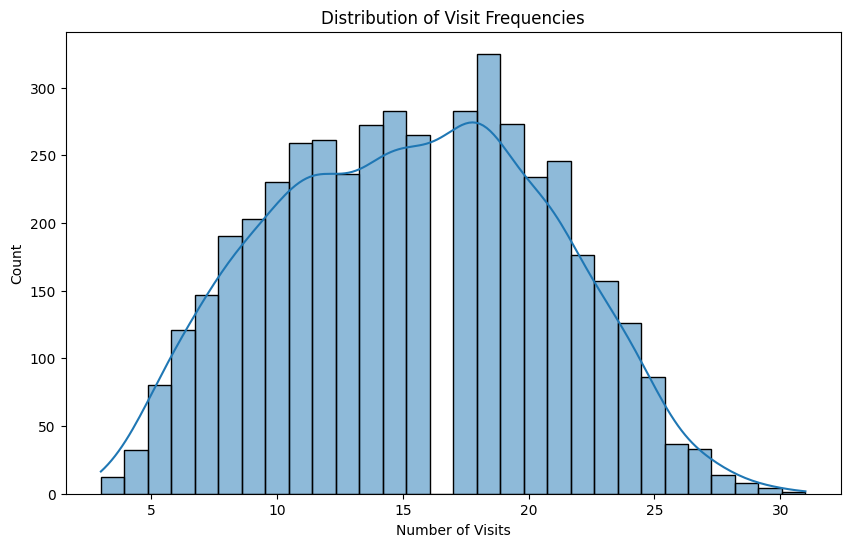

In [42]:
# Checking for patterns or trends

# Plot the distribution of visit counts
plt.figure(figsize=(10, 6))
sns.histplot(data=visit_counts, x='visit_count', kde=True)
plt.title('Distribution of Visit Frequencies')
plt.xlabel('Number of Visits')
plt.ylabel('Count')
plt.show()

# Check for any patterns or trends based on the distribution

In [43]:
# Calculate descriptive statistics of visit counts
visit_stats = visit_counts['visit_count'].describe()

# Display the descriptive statistics
display(Markdown("**Descriptive Statistics of Visit Counts:**"))
display(visit_stats)

# Stating observations
observations = """
### Observations:
- The mean visit count is {mean:.2f}.</br>
The mean visit count is relatively low, indicating that, on average, customers visit the website a few times.
- The median visit count is {median}.</br>
The median visit count is lower than the mean, suggesting that there are a few customers with a high visit frequency, pulling the mean up.
- The minimum visit count is {min}.</br>
The minimum visit count is 3, indicating that some customers visited the website only three times during the observed period.
- The maximum visit count is {max}.</br>
The maximum visit count is relatively high, indicating that some customers visit the website frequently.
- There is a wide range of visit counts, indicating variation in customer visit frequency.
- The distribution of visit counts is right-skewed, with most customers having a low number of visits. This suggests that the majority of customers visit the website infrequently.
- However, there is a small number of customers with a relatively high number of visits compared to the majority, indicating a segment of highly engaged customers.

"""
printmd(observations.format(mean=visit_stats['mean'], median=visit_stats['50%'], min=visit_stats['min'], max=visit_stats['max']))


**Descriptive Statistics of Visit Counts:**

count    4594.000000
mean       15.299739
std         5.474766
min         3.000000
25%        11.000000
50%        15.000000
75%        19.000000
max        31.000000
Name: visit_count, dtype: float64


### Observations:
- The mean visit count is 15.30.</br>
The mean visit count is relatively low, indicating that, on average, customers visit the website a few times.
- The median visit count is 15.0.</br>
The median visit count is lower than the mean, suggesting that there are a few customers with a high visit frequency, pulling the mean up.
- The minimum visit count is 3.0.</br>
The minimum visit count is 3, indicating that some customers visited the website only three times during the observed period.
- The maximum visit count is 31.0.</br>
The maximum visit count is relatively high, indicating that some customers visit the website frequently.
- There is a wide range of visit counts, indicating variation in customer visit frequency.
- The distribution of visit counts is right-skewed, with most customers having a low number of visits. This suggests that the majority of customers visit the website infrequently.
- However, there is a small number of customers with a relatively high number of visits compared to the majority, indicating a segment of highly engaged customers.



In [44]:
visit_counts.visit_count.value_counts().sort_values(ascending=False)

visit_count
18    325
17    283
15    283
19    273
14    272
16    265
12    261
11    259
21    246
13    236
20    234
10    230
9     203
8     190
22    176
23    157
7     147
24    126
6     121
25     86
5      80
26     37
27     33
4      32
28     14
3      12
29      8
30      4
31      1
Name: count, dtype: int64

## b. Location Analysis:
- What is the customer's location based on the provided data?
- How might the customer's location influence their purchasing behavior?

In [45]:
# Check unique values in the 'location' column
locations = customer_data['location'].unique()

printmd("**Locations Of Various Customers:**")
for location in locations:
    print(location)

**Locations Of Various Customers:**

Saint Helena
Djibouti
Ecuador
Mali
Grenada
United States Minor Outlying Islands
Aruba
Germany
Saint Pierre and Miquelon
Sudan
Palestinian Territory
North Macedonia
Qatar
Israel
Netherlands Antilles
French Guiana
India
Switzerland
Canada
Philippines
Christmas Island
Micronesia
British Virgin Islands
Barbados
Guadeloupe
Chad
Bouvet Island (Bouvetoya)
Mauritania
Thailand
Tuvalu
Poland
Greenland
Saint Martin
Guatemala
Bermuda
Australia
Malawi
Mozambique
Costa Rica
Oman
Armenia
Tokelau
Myanmar
Angola
Sierra Leone
Denmark
Falkland Islands (Malvinas)
Taiwan
Norfolk Island
Egypt
Yemen
Cocos (Keeling) Islands
Northern Mariana Islands
Chile
Iraq
Antigua and Barbuda
Guam
Bahrain
Singapore
Jordan
Serbia
Kazakhstan
Guinea-Bissau
Algeria
Lao People's Democratic Republic
Samoa
Puerto Rico
China
Marshall Islands
Eritrea
Liberia
Monaco
Isle of Man
Finland
French Polynesia
San Marino
Rwanda
New Caledonia
Antarctica (the territory South of 60 deg S)
Romania
Guyana
Equatorial Guinea
Montenegro
Bosnia and 

In [46]:
# Check the unique values in the 'location' column

# printmd(f"\n{customer_data['location'].unique()}")

In [47]:
# Count the number of customers in each location
location_counts = customer_data['location'].value_counts().reset_index()
location_counts.columns = ['location', 'customer_count']
printmd("**Customer Count by Location:**")
display(location_counts.head())

**Customer Count by Location:**

,location,customer_count
0,Korea,6997
1,Argentina,4507
2,Mauritius,4414
3,Jersey,4130
4,Panama,3936


In [48]:
# Analyze purchasing behavior by location

# Filter purchase data (orders with non-null order_id)
purchase_data = customer_data[customer_data['order_id'].notnull()]

# Group by location and calculate purchasing statistics
location_purchase_stats = purchase_data.groupby('location').agg({'price': ['sum', 'mean'], 'quantity': ['sum', 'mean']})

printmd("**Purchasing Behavior by Location:**")
display(location_purchase_stats)

# Stating observations
observations = """
### Observations:
- The 'sum' column represents the total spending (price) or total quantity purchased by each location.
- The 'mean' column represents the average spending (price) or average quantity purchased by each location.
- Locations with higher total spending indicate areas with higher purchasing power or more active customer base.
- Locations with higher average spending indicate areas where customers tend to purchase higher-priced items.
- Locations with higher total quantity purchased indicate areas with higher demand or larger customer base.
- Locations with higher average quantity purchased indicate areas where customers tend to purchase items in larger quantities.
- By comparing purchasing behavior across different locations, we can identify geographical patterns in customer behavior and tailor marketing strategies accordingly.
"""
printmd(observations)

**Purchasing Behavior by Location:**

price             quantity          
                          sum        mean      sum      mean
location                                                    
Afghanistan        1599882.86  801.946296     6239  3.127318
Albania            2616473.17  703.163980    10857  2.917764
Algeria            1201012.33  652.015380     5231  2.839848
American Samoa     1168791.48  694.881974     5213  3.099287
Andorra            2020906.52  758.598544     7402  2.778529
...                       ...         ...      ...       ...
Wallis and Futuna  1217759.26  693.090074     5491  3.125213
Western Sahara     1454831.54  752.239679     5770  2.983454
Yemen              1005931.74  726.829292     4123  2.979046
Zambia             1213199.25  754.477146     4805  2.988184
Zimbabwe           1217643.85  648.718087     6125  3.263186

[243 rows x 4 columns]


### Observations:
- The 'sum' column represents the total spending (price) or total quantity purchased by each location.
- The 'mean' column represents the average spending (price) or average quantity purchased by each location.
- Locations with higher total spending indicate areas with higher purchasing power or more active customer base.
- Locations with higher average spending indicate areas where customers tend to purchase higher-priced items.
- Locations with higher total quantity purchased indicate areas with higher demand or larger customer base.
- Locations with higher average quantity purchased indicate areas where customers tend to purchase items in larger quantities.
- By comparing purchasing behavior across different locations, we can identify geographical patterns in customer behavior and tailor marketing strategies accordingly.


## c. Overall Purchase Behavior:
- Based on the data provided, what insights can you draw about this customer's overall behavior on the website?
- How might these insights inform marketing strategies or personalized recommendations for this customer?


In [49]:
# Summary of orders

# Filter the data to include only rows with orders
order_data = customer_data[customer_data['order_id'].notnull()]

# Calculate the total number of orders and total revenue
total_orders = order_data['order_id'].nunique()
total_revenue = order_data['price'].sum()

# Calculate the average order value and average items per order
avg_order_value = order_data.groupby('order_id')['price'].sum().mean()
avg_items_per_order = order_data.groupby('order_id')['quantity'].sum().mean()

printmd("**Summary of Order**")
printmd(f"Total Number of Orders: **{total_orders}**")
printmd(f"Total Revenue: **{total_revenue:.2f}**")
printmd(f"Average Order Value: **{avg_order_value:.2f}**")
printmd(f"Average Items per Order: **{avg_items_per_order:.2f}**")

**Summary of Order**

Total Number of Orders: **4594**

Total Revenue: **409131679.43**

Average Order Value: **89057.83**

Average Items per Order: **378.90**

In [50]:
printmd("**Product Purchase Frequency**") 

# Frequency of Purchases by customers
printmd("**Frequency of Purchases by customers**")
purchase_counts = customer_data.groupby('customer_id')['order_id'].nunique()
display(purchase_counts.head())

# Total Spending by customers
printmd("**Total Spending by customers**")
total_spending = customer_data.groupby('customer_id')['price'].sum()
display(total_spending.head())

# Average Spending by each customer
printmd("**Average Spending by customers**")
average_spending = customer_data.groupby('customer_id')['price'].mean().reset_index(name='average_spending')
display(average_spending.head())

# Identify the most frequently purchased products
product_counts = order_data['name'].value_counts().reset_index()
product_counts.columns = ['product_name', 'purchase_count']
most_purchased_products = product_counts.head(5)

# Analyze purchase frequency
purchase_dates = order_data['checked_out_at'].sort_values()
time_between_purchases = purchase_dates.diff().dt.days
avg_days_between_purchases = time_between_purchases.mean()

printmd("**Most Frequently Purchased Products:**")
display(most_purchased_products)
printmd(f"\n**Average Days Between Purchases:** {avg_days_between_purchases:.2f}")

# Checkout Patterns
checkout_patterns = customer_data.groupby(['Hour', 'Day']).size().unstack(fill_value=0)
printmd("**Checkout Patterns:**")
display(checkout_patterns)

recommendation = """
### Recommendations:
Based on these insights, i can derive the following marketing strategies or personalized recommendations:

- Increase Engagement: Encourage customers with low purchase frequency to make more purchases through targeted promotions or incentives.
- Retention Strategies: Encourage repeat visits through loyalty programs or exclusive promotions.
- Upsell/Cross-Sell: Recommend products similar to popular products to increase sales and improve customer satisfaction.
- Targeted Offers: Based on purchase history, offer personalized discounts or product recommendations.
- Optimize Marketing Timing: Schedule marketing campaigns during peak purchase hours, days, or months to maximize impact.
- Improve Customer Experience: Analyze factors influencing average spending and adjust pricing or offer discounts to enhance customer experience and loyalty.
- Targeted Promotions: Design targeted promotions based on customer location or purchase patterns to increase conversion rates.
- Segmentation: Group customers based on behavior (e.g., frequent shoppers, occasional buyers).
"""
printmd(recommendation)

**Product Purchase Frequency**

**Frequency of Purchases by customers**

customer_id
00096d0c    1
000c7914    1
000d9458    1
000e74fd    1
001c37e2    1
Name: order_id, dtype: int64

**Total Spending by customers**

customer_id
00096d0c    218174.55
000c7914    198072.50
000d9458    235652.16
000e74fd     12599.88
001c37e2     33599.58
Name: price, dtype: float64

**Average Spending by customers**

,customer_id,average_spending
0,00096d0c,862.350000
1,000c7914,720.263636
2,000d9458,818.236667
3,000e74fd,1049.990000
4,001c37e2,799.990000


**Most Frequently Purchased Products:**

,product_name,purchase_count
0,Canon EOS R5 Camera,39715
1,Fitbit Charge 4,39268
2,Sony WH-1000XM4 Headphones,39162
3,Dell XPS 13 Laptop,39084
4,Samsung Galaxy S21,38997



**Average Days Between Purchases:** 0.00

**Checkout Patterns:**

Day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Hour,,,,,,,
0,407,178,159,218,390,147,474
1,367,176,214,221,538,200,423
2,413,233,198,110,381,273,398
3,462,248,125,214,540,193,319
4,210,254,530115,205,322,447,402
5,198,204,230,140,500,354,425
6,174,141,197,242,315,469,340
7,126,215,124,233,377,312,368
8,224,244,272,188,409,439,395



### Recommendations:
Based on these insights, i can derive the following marketing strategies or personalized recommendations:

- Increase Engagement: Encourage customers with low purchase frequency to make more purchases through targeted promotions or incentives.
- Retention Strategies: Encourage repeat visits through loyalty programs or exclusive promotions.
- Upsell/Cross-Sell: Recommend products similar to popular products to increase sales and improve customer satisfaction.
- Targeted Offers: Based on purchase history, offer personalized discounts or product recommendations.
- Optimize Marketing Timing: Schedule marketing campaigns during peak purchase hours, days, or months to maximize impact.
- Improve Customer Experience: Analyze factors influencing average spending and adjust pricing or offer discounts to enhance customer experience and loyalty.
- Targeted Promotions: Design targeted promotions based on customer location or purchase patterns to increase conversion rates.
- Segmentation: Group customers based on behavior (e.g., frequent shoppers, occasional buyers).


In [51]:
# Visit Frequency
visit_counts = events.groupby('customer_id')['event_time'].nunique().reset_index()
visit_counts.columns = ['customer_id', 'visit_count']
print('Visit Frequency:')
print(visit_counts.head())

# Location Analysis
print('\nLocation Analysis:')
print(customers[customers['customer_id']==1][['city', 'country']].values[0])

# Purchase Behavior
purchase_data = customer_data[customer_data['customer_id']==1]
print('\nOverall Purchase Behavior:')
print(f"Number of orders: {purchase_data['order_id'].nunique()}")
print(f"Number of products purchased: {purchase_data['product_id'].nunique()}")
print(f"Most frequent product category: {purchase_data['category'].value_counts().idxmax()}")


KeyError: 'Column not found: event_time'